In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Carbon_(CO2)_Emissions_by_Country.csv")

In [7]:
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17
...,...,...,...,...,...
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61


In [9]:
df.head(5)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [13]:
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [15]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [17]:
df.shape

(5677, 5)

In [19]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'I

In [21]:
df['Country'].nunique()

190

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [25]:
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [27]:
df.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 221.9+ KB


In [35]:
# Group by Region and compute mean Kilotons of CO2
regional_emissions = df.groupby('Region')['Kilotons of Co2'].mean()
print(regional_emissions)

# Yearly CO2 emission trends
yearly_emissions = df.groupby(df['Date'].dt.year)['Kilotons of Co2'].sum()
print(yearly_emissions)

Region
Africa       18387.753950
Americas    204381.210200
Asia        262610.714557
Europe      145825.438943
Oceania      27821.352633
Name: Kilotons of Co2, dtype: float64
Date
1990    20341800.00
1991    20482540.00
1992    20513040.00
1993    20651120.00
1994    20765250.00
1995    21356750.00
1996    21807640.00
1997    22183020.00
1998    22303000.00
1999    22406130.00
2000    23123390.00
2001    23518340.00
2002    23833349.80
2003    24939900.31
2004    26073289.89
2005    27039670.03
2006    27916500.20
2007    28968049.92
2008    29191159.84
2009    28867640.01
2010    30619529.64
2011    31584239.82
2012    32015620.18
2013    32665170.52
2014    32742940.00
2015    32541869.55
2016    32564800.27
2017    33053139.82
2018    33817899.77
2019    33871179.99
Name: Kilotons of Co2, dtype: float64


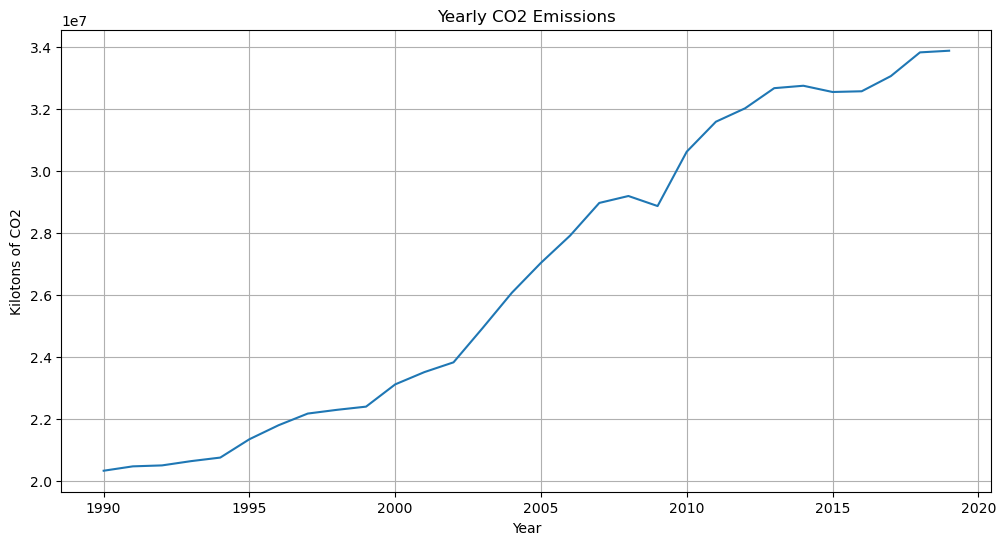

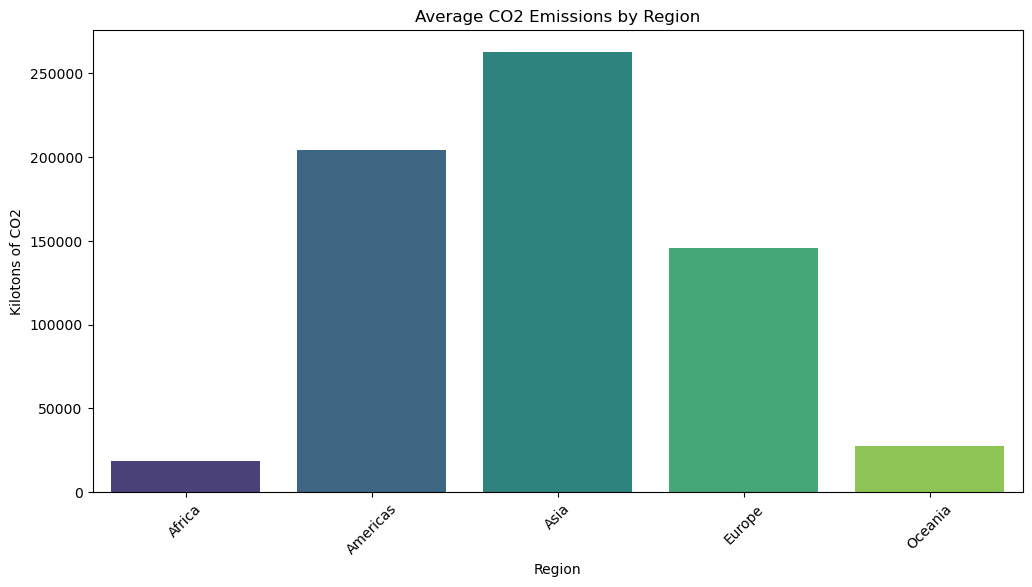

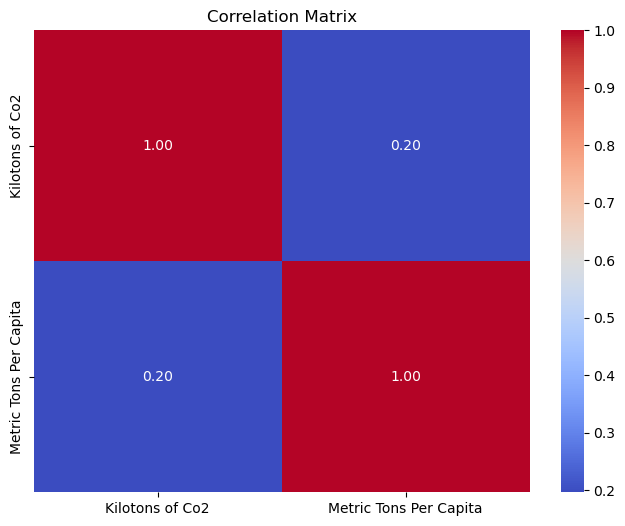

In [37]:
# Line plot: Yearly CO2 emissions
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values)
plt.title('Yearly CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.grid(True)
plt.show()

# Bar plot: Average CO2 emissions by region
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_emissions.index, y=regional_emissions.values, palette='viridis')
plt.title('Average CO2 Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Kilotons of CO2')
plt.xticks(rotation=45)
plt.show()



# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Preprocessing and splitting the dataset in one block
df['Year'] = df['Date'].dt.year
X = pd.get_dummies(df.drop(columns=['Date', 'Kilotons of Co2']), 
                   columns=['Country', 'Region'], 
                   drop_first=True)
y = df['Kilotons of Co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

In [44]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [46]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print('-' * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Performance:
Mean Squared Error: 50492278701.19
Root Mean Squared Error: 224704.87
Mean Absolute Error: 47763.41
R^2 Score: 0.84
------------------------------
Random Forest Regressor Performance:
Mean Squared Error: 143154691.96
Root Mean Squared Error: 11964.73
Mean Absolute Error: 3000.75
R^2 Score: 1.00
------------------------------


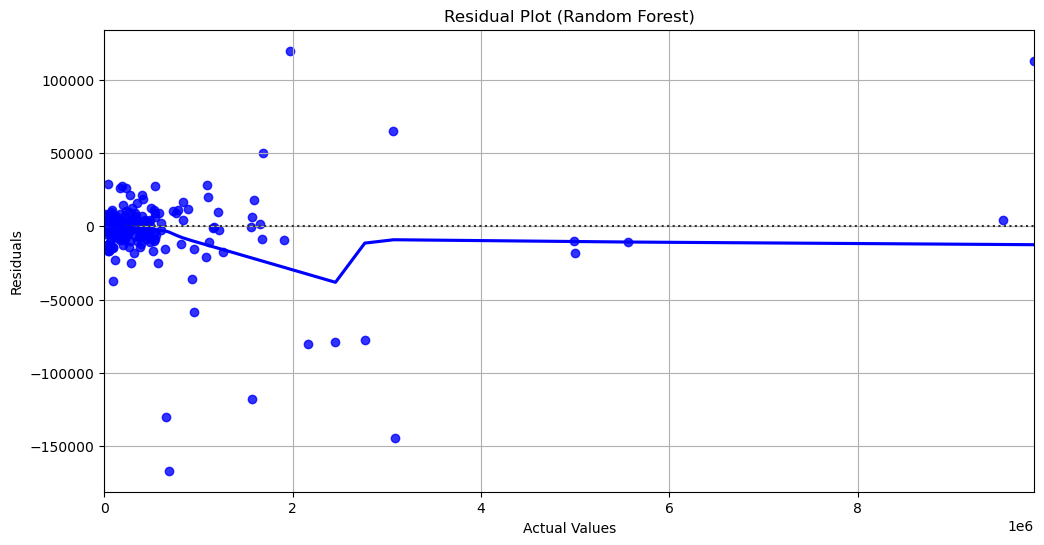

In [48]:
# Residual plots for Random Forest
plt.figure(figsize=(12, 6))
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, color='blue')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [50]:
# Predict CO2 emissions for a new input
new_data = pd.DataFrame({
    'Year': [2025],
    'Metric Tons Per Capita': [0.5],
    # Add one-hot encoded columns for Country and Region
    # Ensure new_data matches the feature space of your model
})

# Fill missing one-hot columns with 0
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Predict using Random Forest
prediction = rf_model.predict(new_data)
print(f'Predicted CO2 Emissions: {prediction[0]:.2f} Kilotons')

Predicted CO2 Emissions: 948.00 Kilotons
